In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score

In [33]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [34]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [35]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [36]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [37]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [38]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [39]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
scaler = StandardScaler()
X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [41]:
model = Sequential()
model.add(Dense(11,activation='sigmoid',input_dim=11))
model.add(Dense(11,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 11)                132       
                                                                 
 dense_4 (Dense)             (None, 11)                132       
                                                                 
 dense_5 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [43]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [44]:
history = model.fit(X_train,y_train,batch_size=25,epochs=200,verbose=1,validation_split=0.2)

Epoch 1/200
256/256 [==============================] - 1s 3ms/step - loss: 0.6174 - accuracy: 0.6670 - val_loss: 0.5180 - val_accuracy: 0.7969
Epoch 2/200
256/256 [==============================] - 1s 2ms/step - loss: 0.5098 - accuracy: 0.7958 - val_loss: 0.5058 - val_accuracy: 0.7969
Epoch 3/200
256/256 [==============================] - 1s 2ms/step - loss: 0.5063 - accuracy: 0.7958 - val_loss: 0.5047 - val_accuracy: 0.7969
Epoch 4/200
256/256 [==============================] - 1s 4ms/step - loss: 0.5058 - accuracy: 0.7958 - val_loss: 0.5042 - val_accuracy: 0.7969
Epoch 5/200
256/256 [==============================] - 1s 3ms/step - loss: 0.5055 - accuracy: 0.7958 - val_loss: 0.5037 - val_accuracy: 0.7969
Epoch 6/200
256/256 [==============================] - 1s 3ms/step - loss: 0.5057 - accuracy: 0.7958 - val_loss: 0.5030 - val_accuracy: 0.7969
Epoch 7/200
256/256 [==============================] - 1s 3ms/step - loss: 0.5056 - accuracy: 0.7958 - val_loss: 0.5030 - val_accuracy: 0.7969

In [45]:
y_pred = model.predict(X_test)

63/63 [==============================] - 0s 1ms/step


In [46]:
y_pred = y_pred.argmax(axis=-1)

In [47]:
accuracy_score(y_test,y_pred)

0.7975

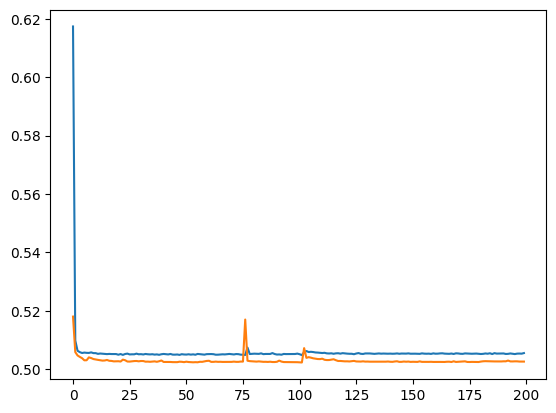

In [48]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

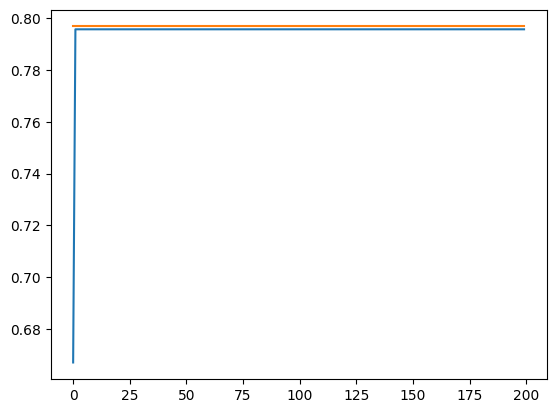

In [49]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])